In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

1) Using the rnorm() function in R (or equivalent in Matlab or Python or etc), create a vector, x,
containing 5000 observations drawn from a Gaussian distribution N(0, 1) [ie, a normal distribution
with mean 0 and variance 1]. This vector x represents your set of inputs x



In [0]:
x=np.random.normal(0,1,5000)

2) Using the rnorm() function in R (or equivalent in Matlab or Python or etc), create a vector, eps,
containing 5000 observation drawn from a N(0, 0.25) distribution; ie, a normal distribution with
mean 0 and variance 0.25. 

In [0]:
eps = np.random.normal(0,0.25,5000)

3) Using vectors x and eps, generate a vector y according to the model
y = -1 + 0.5x – 2x2 + 0.3x3 + eps

w_true = (-1, +0.5, -2, +0.3).

In [0]:
x1=x
x2=x**2
x3=x**3
y = -1 + 0.5*x1-2*x2 + 0.3*x3 + eps
# y = -1 + 0.5*x1-2*x2 + 7*x3 + eps

# Setting up the input vectors and appending 1 in the start as x_0

In [0]:
inp_x=[]
for i in range(x.size):
  temp=[]
  inp_x.append([1,x1[i],x2[i],x3[i]])
# print(inp_x)

# Initializing the weight vector

In [0]:
np.random.seed(1000)
w = np.random.random(4)
itr = 1
etta = 0.00001 #learning rate

In [0]:
print("Weight vector:")
print(str(w))
error=[]

Weight vector:
[0.65358959 0.11500694 0.95028286 0.4821914 ]


### Batch Mode GD updates w after summing over **all** x(i), y(i)
We sum all the errors in delta_w vector and weight is updated in the end 


In [0]:
while itr != 100:
  delta_w=np.zeros(w.size)
  for i in range(x.size):
    y_i = np.dot(w,inp_x[i])
    err = y[i]-y_i
    for j in range(w.size):
      delta_w[j]+=float(etta*(err)*inp_x[i][j])
    error.append(err**2)
  for k in range(w.size):
    w[k]+=delta_w[k]
  itr+=1 

In [0]:
# Adaline Gradiant Descent function
def Adaline_Batch_GD_1(epoch, x,y,etta,degree):
  inp_x=[]
  temp_variables=[]
  for j in range(1,degree+1):
    temp_variables.append(x**j)
  for j in range(x.size):
    temp=[1]
    for k in range(len(temp_variables)):
      temp.append(temp_variables[k][j])
    # print(temp)
    inp_x.append(temp)
  # print('Input Vector:',inp_x)
  error=[]
  np.random.seed(1000)
  w = np.random.random(degree+1)
  itr = 1
  while itr != epoch:
    delta_w=np.zeros(w.size)
    for i in range(x.size):
      y_i = np.dot(w,inp_x[i])
      err = y[i]-y_i
      for j in range(w.size):
        delta_w[j]+=float(etta*(err)*inp_x[i][j])
      error.append(err**2)
    for k in range(w.size):
      w[k]+=delta_w[k]
    itr+=1 
  print("Weight vector after:")
  print(str(w))
  print("True Weights:" )
  print(str([-1, 0.5, -2, 0.3]))
  plt.figure()
  plt.plot(error)
  plt.xlabel("Iterations")
  plt.ylabel("Error value for degree:"+str(degree))
  return w,inp_x

Weight vector after:
[-0.98572634  0.43703395 -2.00692824  0.31504489]
True Weights:
[-1, 0.5, -2, 0.3]


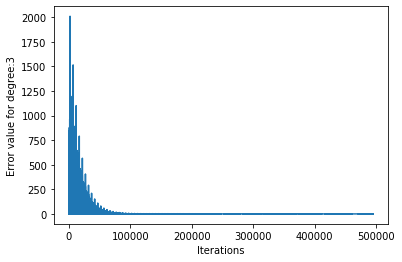

In [0]:
w,a=Adaline_Batch_GD_1(epoch=100,x=x,y=y,etta=0.00001,degree=3)

In [0]:
#calculate cross validation score
def predict(w,x):
  # print(str(w),str(x))
  return np.dot(w,x)

def calc_score(w, inp_x,y):
  pred_vals=[]
  actual =[]
  for i in range(len(inp_x)):
    pred_vals.append(predict(w,inp_x[i]))
    actual.append(y[i])
  # print(str(pred_vals),str(actual))
  actual= np.array(actual)
  pred_vals = np.array(pred_vals)
  err= sum((actual-pred_vals)**2/len(actual))
  return err
    
def cross_validation_1(x,y, epochs,etta,degree):
  # epochs = [10,50,100,200]
  score=[]
  for i in degree:
    w,inp_x = Adaline_Batch_GD_1(epochs, x=x,y=y,etta=0.00001,degree=i)
    score.append(calc_score(w,inp_x,y))
  index= np.argmin(score)
  print('Score:',score)
  return(degree[index])

Weight vector after:
[-2.93988815  1.48751097]
True Weights:
[-1, 0.5, -2, 0.3]
Weight vector after:
[-0.95738241  1.35826679 -2.03685985]
True Weights:
[-1, 0.5, -2, 0.3]
Weight vector after:
[-0.98572634  0.43703395 -2.00692824  0.31504489]
True Weights:
[-1, 0.5, -2, 0.3]
Score: [8.132353866302486, 0.49681769239929024, 0.0636808972146357]
Best Degree =: 3


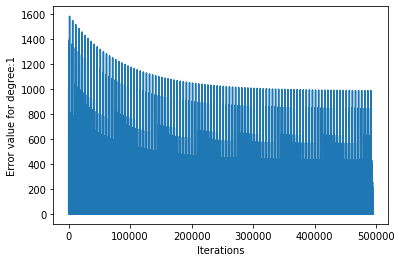

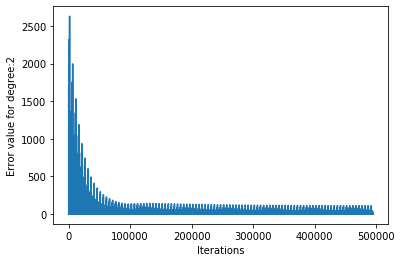

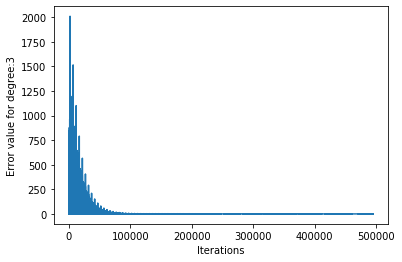

In [0]:
optimal_degree=cross_validation_1(x,y,epochs=100,etta=0.00001,degree=[1,2,3])
print('Best Degree =:',optimal_degree)

### Incremental Mode GD updates w for **each** x(i), y(i)

Here we Update weight for each data point

Initilization

In [0]:
np.random.seed(1000)
w = np.random.random(4)
itr = 1
etta = 0.001 #learning rate
print("Weight vector:")
print(str(w))
error=[]

Weight vector:
[0.65358959 0.11500694 0.95028286 0.4821914 ]


In [0]:
while itr != 2:
  for i in range(x.size):
    y_i = np.dot(w,inp_x[i])
    err = y[i]-y_i
    for j in range(w.size):
      w[j]+=float(etta*(err)*inp_x[i][j])
    error.append(err**2)
  itr+=1 

Weight vector after:
[-0.97760411  0.42242011 -2.00882279  0.33281329]
True Weights:
[-1, 0.5, -2, 0.3]


Text(0, 0.5, 'Error value')

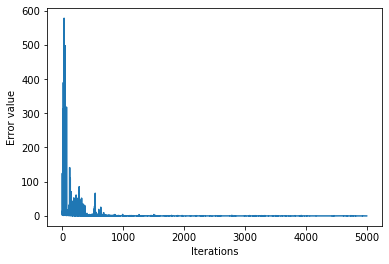

In [0]:
print("Weight vector after:")
print(str(w))
print("True Weights:" )
print(str([-1, 0.5, -2, 0.3]))
plt.figure()
plt.plot(error)
plt.xlabel("Iterations")
plt.ylabel("Error value")